In [134]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [135]:
star_wars=star_wars[np.isfinite(star_wars['RespondentID'])]
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [136]:
cols = ['Have you seen any of the 6 films in the Star Wars franchise?','Do you consider yourself to be a fan of the Star Wars film franchise?']
yes_no = {'Yes':True , 'No':False}
for col in cols:
    star_wars[col] = star_wars[col].map(yes_no)

#star_wars.head()

In [137]:
#Renaming column names to seen_*movienumber*
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.' : 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'    
})

In [138]:
#creating map of True/False for movies
movie_responses = {}
for col in star_wars.columns[3:9]:
    movie_responses[star_wars.iloc[0][col]]=True
movie_responses[np.nan]=False
movie_responses

{nan: False,
 'Star Wars: Episode III  Revenge of the Sith': True,
 'Star Wars: Episode V The Empire Strikes Back': True,
 'Star Wars: Episode I  The Phantom Menace': True,
 'Star Wars: Episode II  Attack of the Clones': True,
 'Star Wars: Episode IV  A New Hope': True,
 'Star Wars: Episode VI Return of the Jedi': True}

In [139]:
#mapping the responses of the 6 movies to True/False responses
for col in star_wars.columns[3:9]:
    star_wars[col]=star_wars[col].map(movie_responses)
#star_wars.head()

In [140]:
#Renaming rankins column names and converting rankings to float
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'    
})
star_wars[star_wars.columns[:15]].head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0


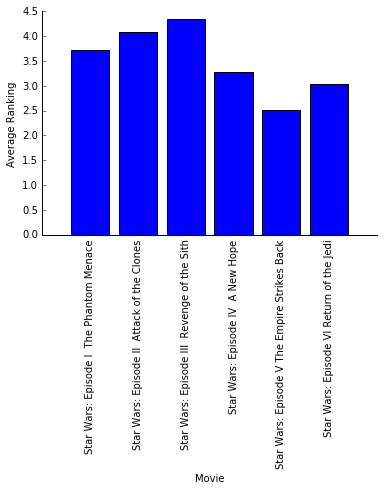

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt

ranking_mean = list(star_wars[star_wars.columns[9:15]].mean())
movie_labels = ['Star Wars: Episode I  The Phantom Menace',
           'Star Wars: Episode II  Attack of the Clones',
           'Star Wars: Episode III  Revenge of the Sith',
           'Star Wars: Episode IV  A New Hope',
           'Star Wars: Episode V The Empire Strikes Back',
           'Star Wars: Episode VI Return of the Jedi']

fig, ax = plt.subplots()
ax.bar(np.arange(len(ranking_mean)),ranking_mean, align='center')
ax.set_xlabel('Movie')
ax.set_ylabel('Average Ranking')
ax.set_xticks(range(6))
ax.set_xticklabels(movie_labels, rotation =90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.show()

Till now we cleaned the data by renaming columns to insightfull names, converted rankings to float and calculated their mean value through which we get the average ranking obtained by each episode. The above plot shows the average ranking each episode has received, and it seems that Episode 5 (The Empire Strikes Back), has received the highest ranking (1 being heighest and 6 being lowest).

## Most viewed

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


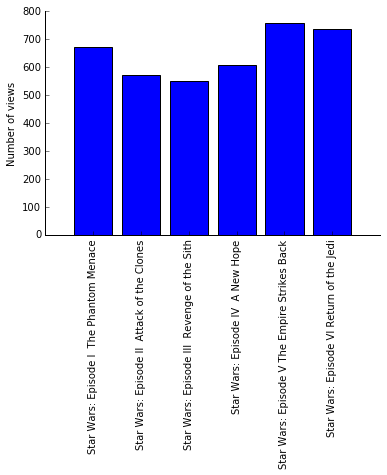

In [209]:
print(star_wars[star_wars.columns[3:9]].sum())
views = list(star_wars[star_wars.columns[3:9]].sum())

fig, ax = plt.subplots()
ax.bar(np.arange(len(ranking_mean)),views, align='center')
ax.set_ylabel('Number of views')
ax.set_xticks(range(6))
ax.set_xticklabels(movie_labels, rotation =90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.show()

Episodes 5, 6 are most viewed episodes of Star Wars with more than 700 views and this is reflected in the rankings plot before, where they received the highest rankings.

## Gender Analysis

In [194]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

### Male  vs Female Rankings

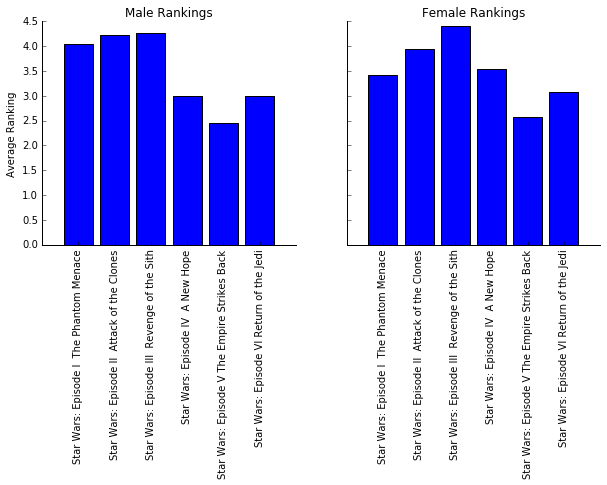

In [226]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
fig.set_figheight(4)
fig.set_figwidth(10)
ranking_mean_males = list(males[males.columns[9:15]].mean())
ranking_mean_females = list(females[females.columns[9:15]].mean())

#Male Rankings Bar Plot
ax1.bar(np.arange(len(ranking_mean_males)),ranking_mean_males, align='center')
ax1.set_title('Male Rankings')
ax1.set_ylabel('Average Ranking')
ax1.set_xticks(range(6))
ax1.set_xticklabels(movie_labels, rotation =90)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

#Female Rankings Bar Plot
ax2.bar(np.arange(len(ranking_mean_females)),ranking_mean_females, align='center')
ax2.set_title('Female Rankings')
ax2.set_xticks(range(6))
ax2.set_xticklabels(movie_labels, rotation =90)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()

plt.show()

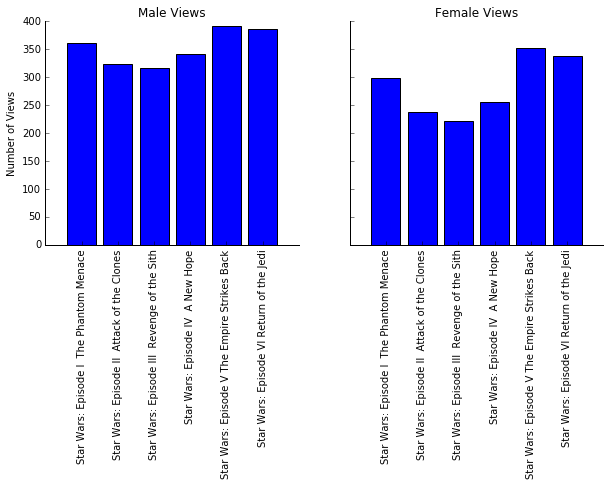

In [224]:
views_males = list(males[males.columns[3:9]].sum())
views_females = list(females[females.columns[3:9]].sum())

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
fig.set_figheight(4)
fig.set_figwidth(10)

#Male Views Bar Plot
ax1.bar(np.arange(len(views_males)),views_males, align='center')
ax1.set_title('Male Views')
ax1.set_ylabel('Number of Views')
ax1.set_xticks(range(6))
ax1.set_xticklabels(movie_labels, rotation =90)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

#Female Views Bar Plot
ax2.bar(np.arange(len(views_females)),views_females, align='center')
ax2.set_title('Female Views')
ax2.set_xticks(range(6))
ax2.set_xticklabels(movie_labels, rotation =90)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()
plt.show()

In [ ]:
From the above plots it is displayed that males consider the original episodes ()